<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">November 2023</p>
<p style="margin: 0; text-align:right;">Complex data in health</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

import localization
import separation

# 1. Disease modules

In [2]:
dga = pd.read_csv("data/disease_gene.tsv", sep='\t')
cleaned_dga = dga[dga.diseaseType == 'disease'][['geneSymbol', 'diseaseName']].drop_duplicates()

scz = cleaned_dga[cleaned_dga.diseaseName == 'Schizophrenia']

In [3]:
scz

,geneSymbol,diseaseName
1,A1BG,Schizophrenia
174,ABCA1,Schizophrenia
384,ACHE,Schizophrenia
486,ACP1,Schizophrenia
578,ACTB,Schizophrenia
...,...,...
83631,DEL22Q11.2,Schizophrenia
83742,DLG2-AS1,Schizophrenia
83745,TSNAX-DISC1,Schizophrenia
83935,MIR2682,Schizophrenia


In [4]:
scz_genes = list(scz.geneSymbol.unique())

In [7]:
len(scz_genes)

883

In [5]:
ppi = pd.read_csv('data/ppi.csv')

ppi = (ppi[['Symbol_A','Symbol_B']]
       .drop_duplicates()
       .dropna())

gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [6]:
scz_genes_in_ppi = list()

for n in list(gppi.nodes):
    if n in scz_genes:
        scz_genes_in_ppi.append(n)

In [8]:
len(scz_genes_in_ppi)

846

In [9]:
lcc = localization.get_lcc(gppi, scz_genes_in_ppi)

In [10]:
len(lcc)

683

Understand the statistical significance of this disease module

In [11]:
sig_dict = localization.get_random_comparison(gppi, scz_genes_in_ppi, 1000)

In [12]:
random_lcc = sig_dict['LCC_list']

print('Mean: ',sig_dict['mean'])

print('Std: ',sig_dict['std'])

print('z-score: ',sig_dict['z_score'])

print('p-value: ',sig_dict['p_value'])

Mean:  412.271
Std:  35.06456272363881
z-score:  7.720871985022296
p-value:  1.1546319456101628e-14


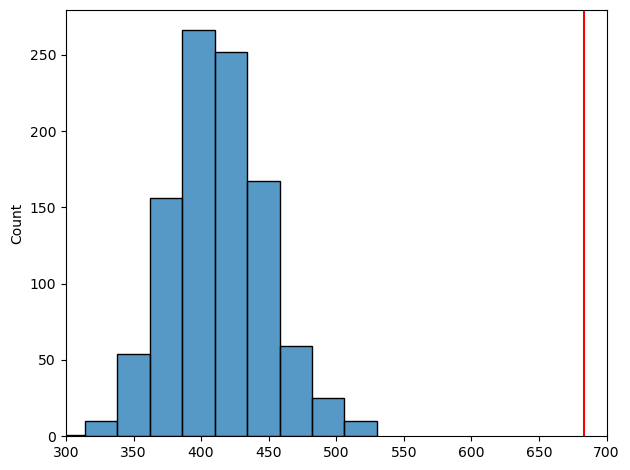

In [13]:
sns.histplot(data=random_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(300, 700)
plt.tight_layout()
plt.show()

Understand the statistical significance of this disease module PRESERVING THE DEGREE DISTRIBUTION

In [14]:
sig_dp_dict = localization.get_random_comparison(gppi, scz_genes_in_ppi, 1000, degree_preserving=True)

In [15]:
random_dp_lcc = sig_dp_dict['LCC_list']

print('Mean: ',sig_dp_dict['mean'])

print('Std: ',sig_dp_dict['std'])

print('z-score: ',sig_dp_dict['z_score'])

print('p-value: ',sig_dp_dict['p_value'])

Mean:  618.675
Std:  11.530627693235093
z-score:  5.578620844530337
p-value:  2.42433024766342e-08


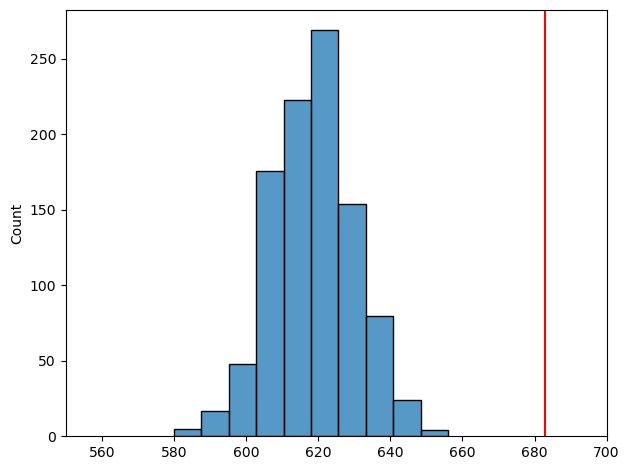

In [16]:
sns.histplot(data=random_dp_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(550, 700)
plt.tight_layout()
plt.show()

# 2. Disease separation

- To study for example the overlap between diseases and understand better comorbidities

In [ ]:
scz = cleaned_dga[cleaned_dga.diseaseName == 'Schizophrenia']

# 3. Disease - drug proximity

- To suggest new drug repurposing opportunities

## EXERCISE

Calculate the LCC, and visualize the modules for the following diseases:

- Autistic Disorder
- Obesity
- Hyperlipidemia
- Rheumatoid Arthritis